In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('milknew.csv')

In [ ]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [ ]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

<Axes: xlabel='Grade', ylabel='count'>

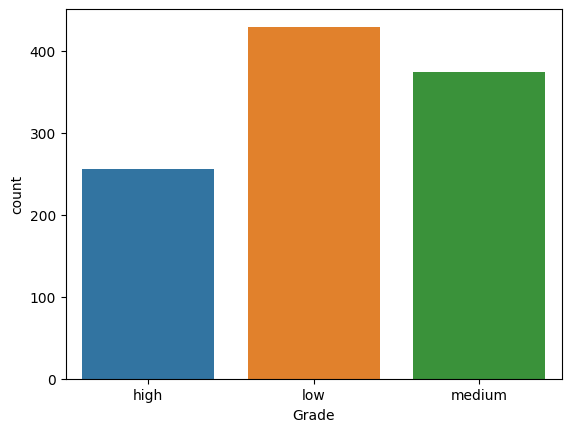

In [ ]:
sns.countplot(x='Grade',data=df,hue='Grade')

In [ ]:
x=df.drop('Grade',axis=1)

In [ ]:
y=df['Grade']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y=pd.DataFrame(y)
y

,0
0,0
1,0
2,1
3,1
4,2
...,...
1054,2
1055,0
1056,1
1057,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.20,random_state=12)

In [ ]:
X_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
655,6.7,38,1,0,1,0,255
37,7.4,65,0,0,0,0,255
468,6.6,35,0,1,1,1,255
326,6.8,45,0,1,1,1,255
241,6.6,38,0,0,0,0,255


In [ ]:
y_train.head()

,0
655,0
37,1
468,0
326,0
241,2


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predict= model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        49
           1       0.87      0.92      0.89        84
           2       0.94      0.82      0.88        79

    accuracy                           0.87       212
   macro avg       0.86      0.87      0.86       212
weighted avg       0.87      0.87      0.87       212



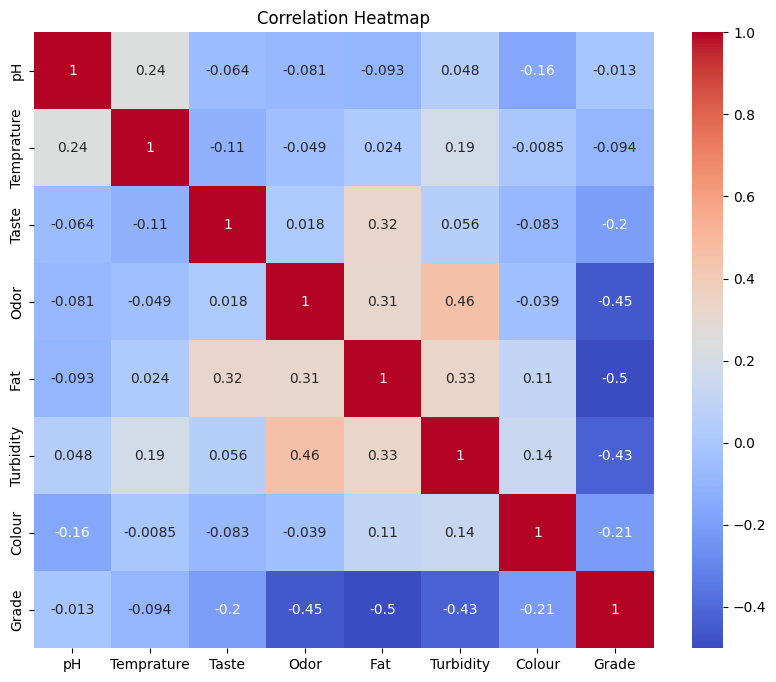

In [ ]:

df['Grade'] = le.fit_transform(df['Grade'])

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [ ]:
pca_model = LogisticRegression()
pca_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predict=pca_model.predict(X_test)
y_predict

array([0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1,
       0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1,
       1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy score :{accuracy_score(y_test,y_predict)*100} %")

Accuracy score :69.81132075471697 %


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.62      0.31      0.41        49
           1       0.67      0.76      0.71        84
           2       0.75      0.87      0.81        79

    accuracy                           0.70       212
   macro avg       0.68      0.65      0.64       212
weighted avg       0.69      0.70      0.68       212

